In [4]:
import pandas as pd

# Assuming column 1 is the second column (Python uses 0-based indexing)
df = pd.read_excel('HDFC_modified.xlsx', index_col="Category",sheet_name="WorkStatus")

df.head()


,CAP LRM cohort,CAP 12 cohort,Average Cumulative Combined KPI - performance Achievement % of Cohort LRM,CAP on COMBINED KPI of Top 10% performers in CAP 12 COHORT,CAP on COMBINED KPI of Bottom 10% performers in CAP 12 COHORT,Performance multiple of the CAP 12 cohort,Average Cumulative KPI 1- performance Achievement % of Cohort LRM,CAP on KPI 1 of Top 10% performers in CAP 12 COHORT,CAP on KPI 1 of Bottom 10% performers in CAP 12 COHORT,Performance multiple ON KPI 1 of the CAP 12 cohort,Time to make the first sale CAP LRM cohort,CAR2CATPO ratio UP TO Residency month 6 for CAP LRM cohort,Count of attrited employees in Cohort LRM,Average Residency of all employees in COHORT LRM,Average Residency of TOP 100 employees in KPI 1 in COHORT LRM,attrition in the first six residency months as a % of people joined ( Cohort LRM),Infant attrition - attritted employees in the first 6 months as a % of all attritted employees in the first 23 months in the sub cohort
Category,,,,,,,,,,,,,,,,,
Active,2866,1068,0.696836,1.866591,0.128534,14.522180,0.803662,2.828391,0.097645,28.966008,6.820934,2.484035,NaN,9.589323,9.752809,NaN,NaN
Inactive,4169,502,0.141789,1.837040,0.108028,17.005259,0.158137,3.143468,0.078580,40.003515,7.855946,1.204261,4169.0,6.308227,9.727273,0.646678,0.646678


C:\Users\gvedh\AppData\Local\Temp\ipykernel_16136\2538217092.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\gvedh\AppData\Local\Temp\ipykernel_16136\2538217092.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\gvedh\AppData\Local\Temp\ipykernel_16136\2538217092.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\gvedh\AppData\Local\Temp\ipykernel_16136\2538217092.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

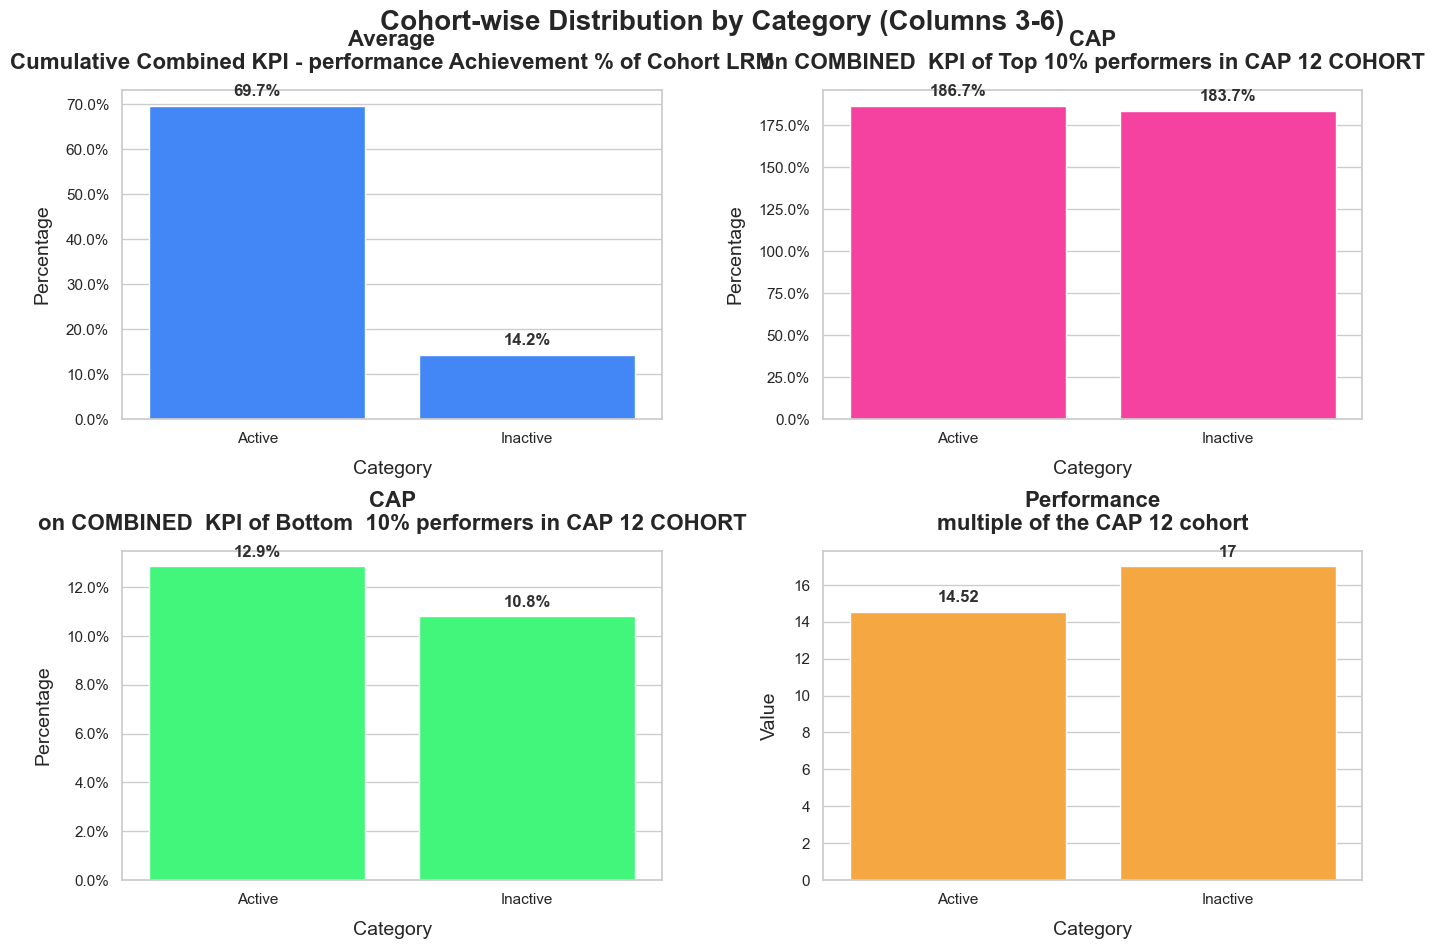

Data being plotted:
             Average Cumulative Combined KPI - performance Achievement % of Cohort LRM  \
Work Status                                                                              
Active                                                0.696836                           
Inactive                                              0.141789                           

             CAP on COMBINED  KPI of Top 10% performers in CAP 12 COHORT  \
Work Status                                                                
Active                                                1.866591             
Inactive                                              1.837040             

             CAP on COMBINED  KPI of Bottom  10% performers in CAP 12 COHORT  \
Work Status                                                                    
Active                                                0.128534                 
Inactive                                              0.108028            

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set seaborn style
sns.set_theme(style="whitegrid")

# Custom colors
colors = ["#4287f5", "#f542a1", "#42f57b", "#f5a742"]

# Ensure 'Work Status' is set as index name
df = df.copy()
df.index.name = "Work Status"

# Select exactly 4 columns
first_four_cols = df.iloc[:, 2:6]

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Flatten axes array
axes = axes.flatten()

# Create bar plots in each subplot
for i, col in enumerate(first_four_cols.columns):
    sns.barplot(
        ax=axes[i],
        x=first_four_cols.index,
        y=first_four_cols[col],
        palette=[colors[i % len(colors)]] * len(first_four_cols),
        saturation=1.0
    )

    # Titles and labels
    # Break the title into two lines intelligently (custom or auto)
    title_lines = col.split(" ", 1)  # Splits at first space
    formatted_title = "\n".join(title_lines)
    axes[i].set_title(formatted_title, fontsize=16, fontweight="bold", pad=15)

    axes[i].set_xlabel("Category", fontsize=14, labelpad=10)
    
    # Determine if this is a percentage column
    is_percentage = '%' in col.lower()
    
    # Set Y-axis label based on data type
    if is_percentage:
        axes[i].set_ylabel("Percentage", fontsize=14, labelpad=10)
        # Format Y-axis as percentage
        axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1%}'))
    else:
        # Check if all values are integers or very close to integers
        all_integers = all(abs(v - round(v)) < 0.01 for v in first_four_cols[col].dropna())
        if all_integers:
            axes[i].set_ylabel("Count", fontsize=14, labelpad=10)
        else:
            axes[i].set_ylabel("Value", fontsize=14, labelpad=10)

    # Annotate bars with appropriate value formatting
    for p in axes[i].patches:
        value = p.get_height()
        # Format values appropriately
        if pd.isna(value):
            label = "N/A"
        elif is_percentage:
            # Format as percentage
            label = f'{value:.1%}'
        elif abs(value - round(value)) < 0.01 and value >= 10:
            # Format as integer for whole numbers
            label = f'{int(value):,}'
        else:
            # Format with appropriate decimals based on magnitude
            if abs(value) < 0.01:
                label = f'{value:.4f}'
            elif abs(value) < 0.1:
                label = f'{value:.3f}'
            elif abs(value) < 1:
                label = f'{value:.2f}'
            elif abs(value) < 10:
                label = f'{value:.1f}'
            else:
                label = f'{value:.2f}'
                
        axes[i].annotate(label,
                         (p.get_x() + p.get_width() / 2., value),
                         ha='center', va='bottom',
                         size=12, fontweight="bold", color="#303030",
                         xytext=(0, 5), textcoords='offset points')

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Tweak spacing: more top margin for the title and between subplots
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.3)

# Add a spacious super title
fig.suptitle("Cohort-wise Distribution by Category (Columns 3-6)", fontsize=20, fontweight="bold")

# Show plot
plt.show()

# Show the data
print("Data being plotted:")
print(first_four_cols)


C:\Users\gvedh\AppData\Local\Temp\ipykernel_16136\1060758656.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\gvedh\AppData\Local\Temp\ipykernel_16136\1060758656.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\gvedh\AppData\Local\Temp\ipykernel_16136\1060758656.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\gvedh\AppData\Local\Temp\ipykernel_16136\1060758656.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

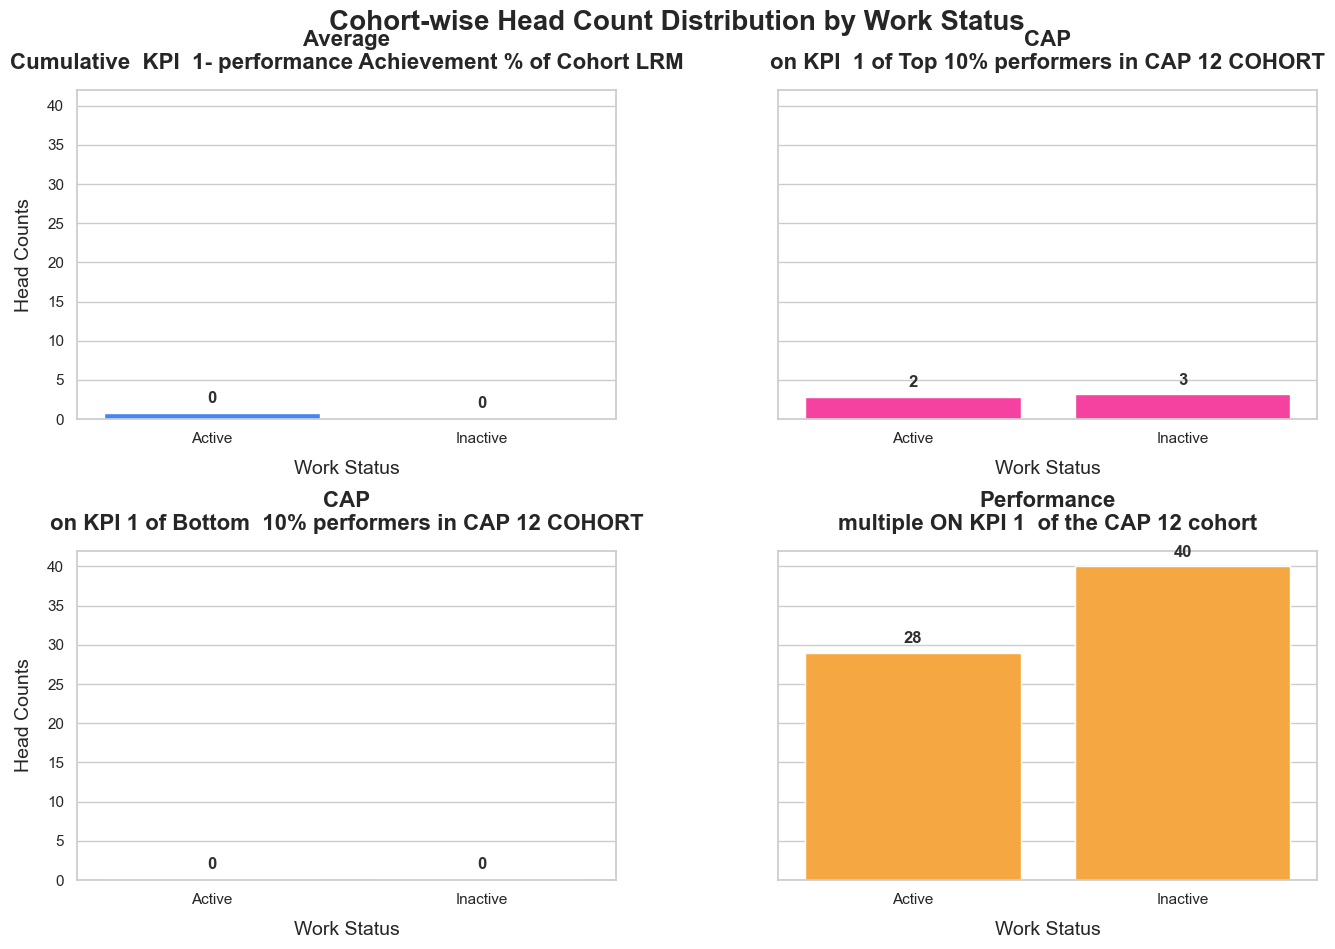

Data being plotted:
             Average Cumulative  KPI  1- performance Achievement % of Cohort LRM  \
Work Status                                                                        
Active                                                0.803662                     
Inactive                                              0.158137                     

             CAP on KPI  1 of Top 10% performers in CAP 12 COHORT  \
Work Status                                                         
Active                                                2.828391      
Inactive                                              3.143468      

             CAP on KPI 1 of Bottom  10% performers in CAP 12 COHORT  \
Work Status                                                            
Active                                                0.097645         
Inactive                                              0.078580         

             Performance multiple ON KPI 1  of the CAP 12 cohort  
Work Statu

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set seaborn style
sns.set_theme(style="whitegrid")

# Custom colors
colors = ["#4287f5", "#f542a1", "#42f57b", "#f5a742"]

# Ensure 'Work Status' is set as index name
df = df.copy()
df.index.name = "Work Status"

# Select exactly 4 columns
first_four_cols = df.iloc[:, 6:10]

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)

# Flatten axes array
axes = axes.flatten()

# Create bar plots in each subplot
for i, col in enumerate(first_four_cols.columns):
    sns.barplot(
        ax=axes[i],
        x=first_four_cols.index,
        y=first_four_cols[col],
        palette=[colors[i % len(colors)]] * len(first_four_cols),
        saturation=1.0
    )

    # Titles and labels

    # Break the title into two lines intelligently (custom or auto)
    title_lines = col.split(" ", 1)  # Splits at first space
    formatted_title = "\n".join(title_lines)
    axes[i].set_title(formatted_title, fontsize=16, fontweight="bold", pad=15)

    axes[i].set_xlabel("Work Status", fontsize=14, labelpad=10)
    axes[i].set_ylabel("Head Counts", fontsize=14, labelpad=10)

    # Annotate bars
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom',
                         size=12, fontweight="bold", color="#303030",
                         xytext=(0, 5), textcoords='offset points')

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Tweak spacing: more top margin for the title and between subplots
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.3)

# Add a spacious super title
fig.suptitle("Cohort-wise Head Count Distribution by Work Status", fontsize=20, fontweight="bold")

# Show plot
plt.show()

# Show the data
print("Data being plotted:")
print(first_four_cols)


C:\Users\gvedh\AppData\Local\Temp\ipykernel_16136\538159047.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\gvedh\AppData\Local\Temp\ipykernel_16136\538159047.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


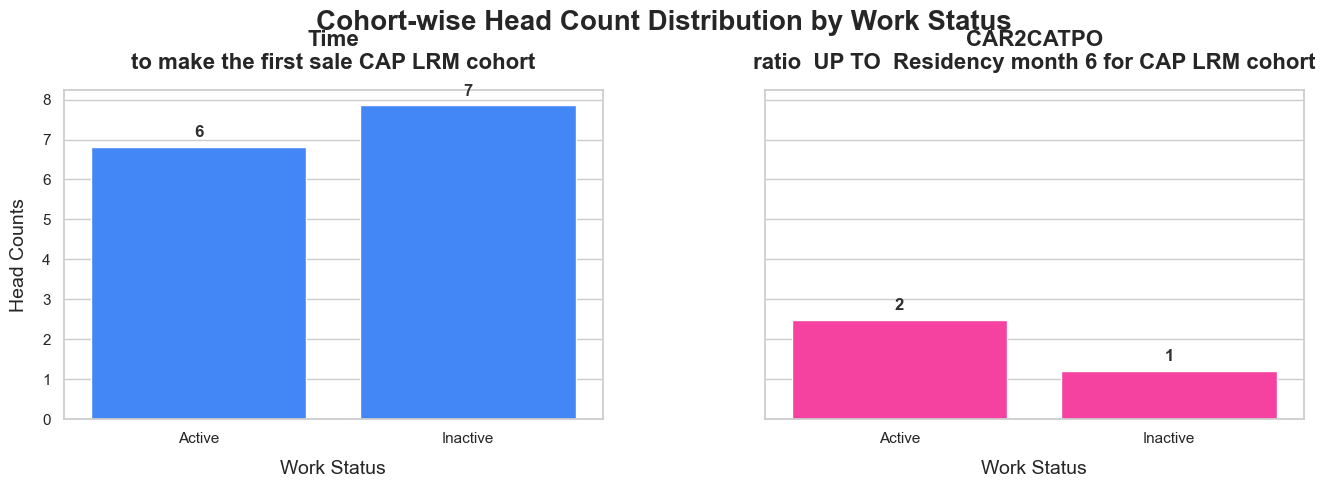

Data being plotted:
             Time to make the first sale CAP LRM cohort  \
Work Status                                               
Active                                         6.820934   
Inactive                                       7.855946   

             CAR2CATPO ratio  UP TO  Residency month 6 for CAP LRM cohort  
Work Status                                                                
Active                                                2.484035             
Inactive                                              1.204261             


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set seaborn style
sns.set_theme(style="whitegrid")

# Custom colors
colors = ["#4287f5", "#f542a1", "#42f57b", "#f5a742"]

# Ensure 'Work Status' is set as index name
df = df.copy()
df.index.name = "Work Status"

# Select exactly 4 columns
first_four_cols = df.iloc[:, 10:12]

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)

# Flatten axes array
axes = axes.flatten()

# Create bar plots in each subplot
for i, col in enumerate(first_four_cols.columns):
    sns.barplot(
        ax=axes[i],
        x=first_four_cols.index,
        y=first_four_cols[col],
        palette=[colors[i % len(colors)]] * len(first_four_cols),
        saturation=1.0
    )

    # Titles and labels

    # Break the title into two lines intelligently (custom or auto)
    title_lines = col.split(" ", 1)  # Splits at first space
    formatted_title = "\n".join(title_lines)
    axes[i].set_title(formatted_title, fontsize=16, fontweight="bold", pad=15)

    axes[i].set_xlabel("Work Status", fontsize=14, labelpad=10)
    axes[i].set_ylabel("Head Counts", fontsize=14, labelpad=10)

    # Annotate bars
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom',
                         size=12, fontweight="bold", color="#303030",
                         xytext=(0, 5), textcoords='offset points')

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Tweak spacing: more top margin for the title and between subplots
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.3)

# Add a spacious super title
fig.suptitle("Cohort-wise Head Count Distribution by Work Status", fontsize=20, fontweight="bold")

# Show plot
plt.show()

# Show the data
print("Data being plotted:")
print(first_four_cols)


C:\Users\gvedh\AppData\Local\Temp\ipykernel_16136\3147691806.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\gvedh\AppData\Local\Temp\ipykernel_16136\3147691806.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\gvedh\AppData\Local\Temp\ipykernel_16136\3147691806.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\gvedh\AppData\Local\Temp\ipykernel_16136\3147691806.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

IndexError: index 4 is out of bounds for axis 0 with size 4

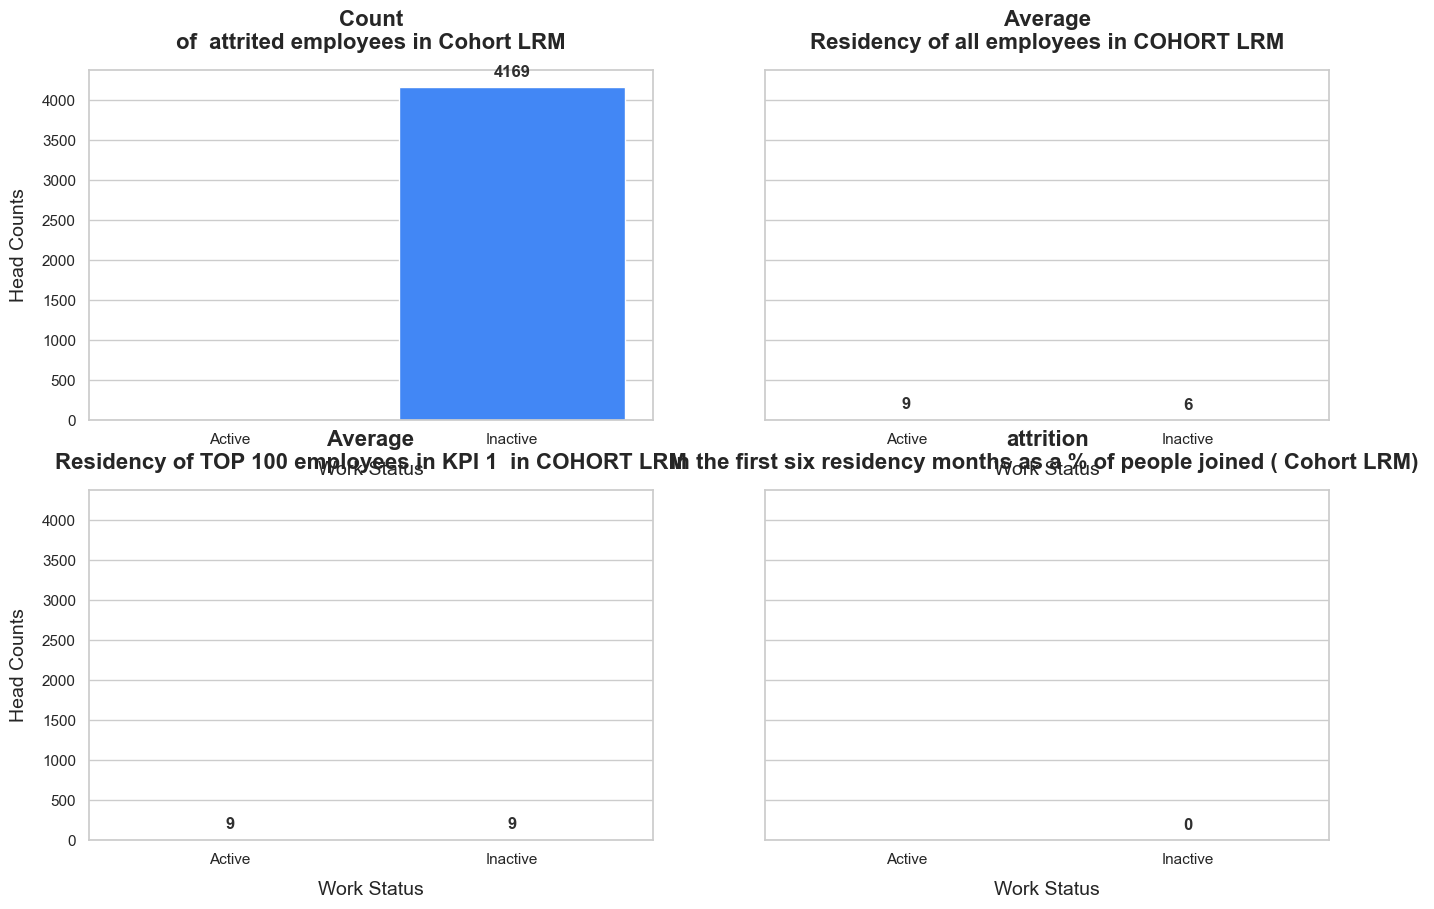

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set seaborn style
sns.set_theme(style="whitegrid")

# Custom colors
colors = ["#4287f5", "#f542a1", "#42f57b", "#f5a742"]

# Ensure 'Work Status' is set as index name
df = df.copy()
df.index.name = "Work Status"

# Select exactly 4 columns
first_four_cols = df.iloc[:, 12:]

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=True)

# Flatten axes array
axes = axes.flatten()

# Create bar plots in each subplot
for i, col in enumerate(first_four_cols.columns):
    sns.barplot(
        ax=axes[i],
        x=first_four_cols.index,
        y=first_four_cols[col],
        palette=[colors[i % len(colors)]] * len(first_four_cols),
        saturation=1.0
    )

    # Titles and labels

    # Break the title into two lines intelligently (custom or auto)
    title_lines = col.split(" ", 1)  # Splits at first space
    formatted_title = "\n".join(title_lines)
    axes[i].set_title(formatted_title, fontsize=16, fontweight="bold", pad=15)

    axes[i].set_xlabel("Work Status", fontsize=14, labelpad=10)
    axes[i].set_ylabel("Head Counts", fontsize=14, labelpad=10)

    # Annotate bars
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom',
                         size=12, fontweight="bold", color="#303030",
                         xytext=(0, 5), textcoords='offset points')

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Tweak spacing: more top margin for the title and between subplots
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.3)

# Add a spacious super title
fig.suptitle("Cohort-wise Head Count Distribution by Work Status", fontsize=20, fontweight="bold")

# Show plot
plt.show()

# Show the data
print("Data being plotted:")
print(first_four_cols)


C:\Users\gvedh\AppData\Local\Temp\ipykernel_18228\678669472.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\gvedh\AppData\Local\Temp\ipykernel_18228\678669472.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\gvedh\AppData\Local\Temp\ipykernel_18228\678669472.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\gvedh\AppData\Local\Temp\ipykernel_18228\678669472.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

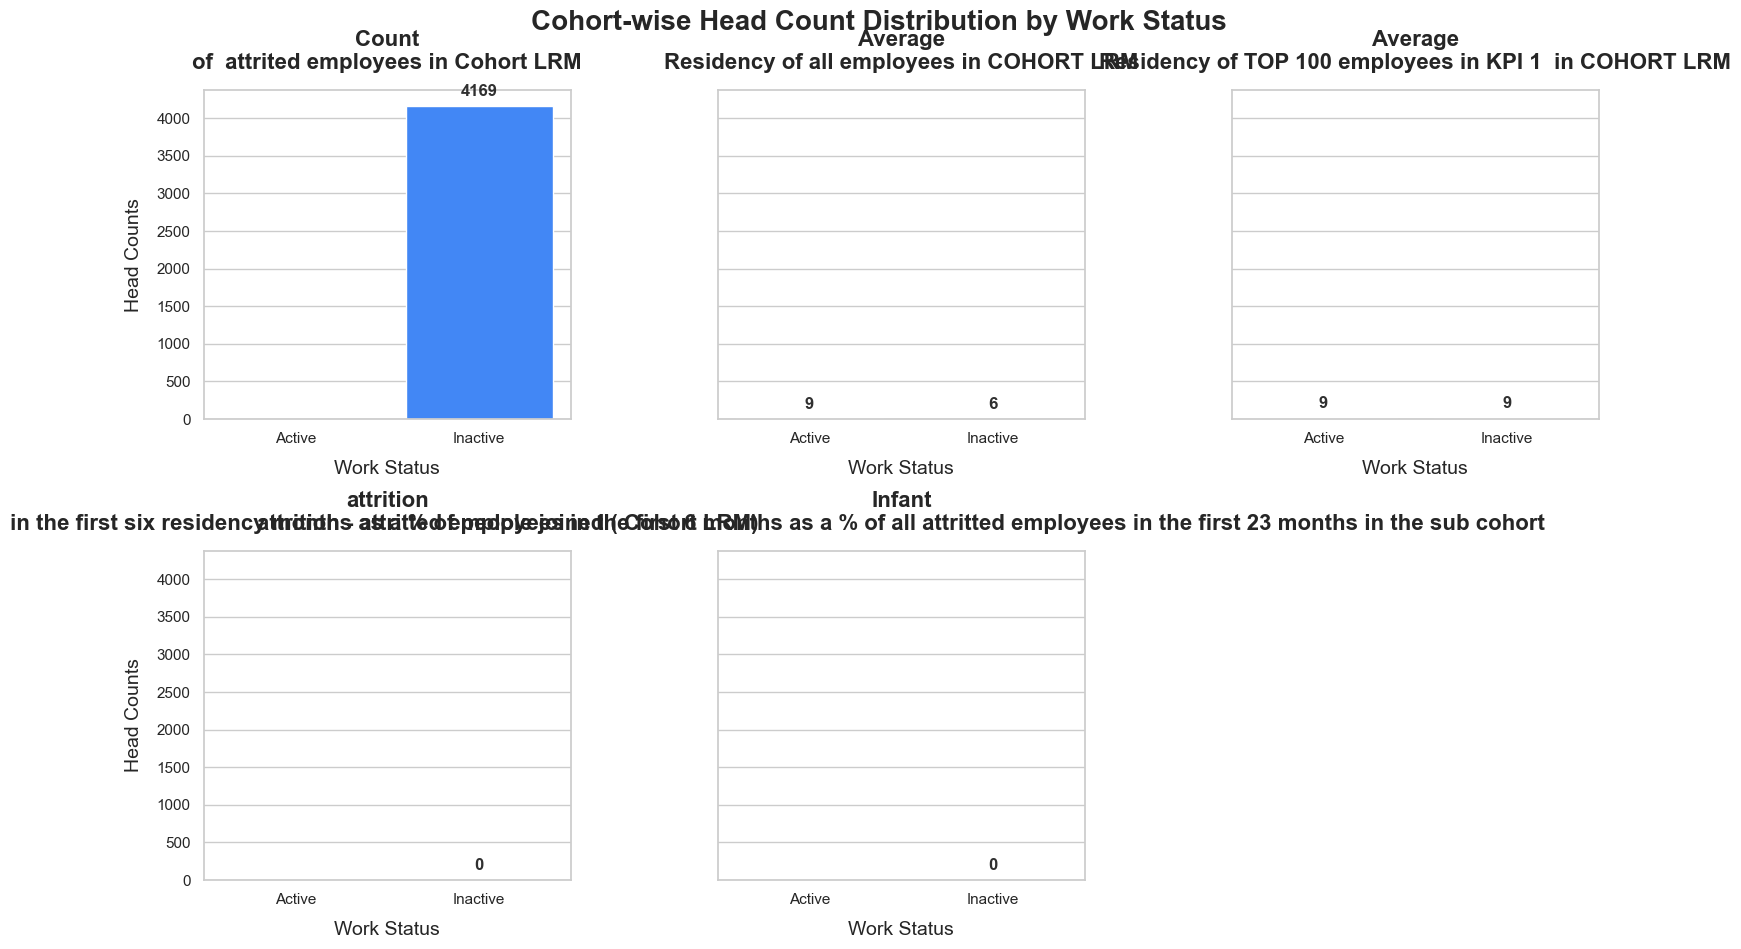

Data being plotted:
             Count of  attrited employees in Cohort LRM  \
Work Status                                               
Active                                              NaN   
Inactive                                         4169.0   

             Average Residency of all employees in COHORT LRM  \
Work Status                                                     
Active                                               9.589323   
Inactive                                             6.308227   

             Average Residency of TOP 100 employees in KPI 1  in COHORT LRM  \
Work Status                                                                   
Active                                                9.752809                
Inactive                                              9.727273                

             attrition in the first six residency months as a % of people joined ( Cohort LRM)   \
Work Status                                                       

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set seaborn style
sns.set_theme(style="whitegrid")

# Custom colors (repeat or expand this if you add more columns)
colors = ["#4287f5", "#f542a1", "#42f57b", "#f5a742", "#9b59b6", "#1abc9c"]

# Ensure 'Work Status' is set as index name
df = df.copy()
df.index.name = "Work Status"

# Select 5 columns
first_five_cols = df.iloc[:, 12:]  # Make sure this gives exactly 5 columns

# Create 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

# Flatten axes array
axes = axes.flatten()

# Create bar plots in each subplot
for i, col in enumerate(first_five_cols.columns):
    sns.barplot(
        ax=axes[i],
        x=first_five_cols.index,
        y=first_five_cols[col],
        palette=[colors[i % len(colors)]] * len(first_five_cols),
        saturation=1.0
    )

    # Title split into two lines
    title_lines = col.split(" ", 1)
    formatted_title = "\n".join(title_lines)
    axes[i].set_title(formatted_title, fontsize=16, fontweight="bold", pad=15)

    # Axis labels
    axes[i].set_xlabel("Work Status", fontsize=14, labelpad=10)
    axes[i].set_ylabel("Head Counts", fontsize=14, labelpad=10)

    # Annotate bars
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom',
                         size=12, fontweight="bold", color="#303030",
                         xytext=(0, 5), textcoords='offset points')

# Remove the unused 6th subplot
for j in range(len(first_five_cols.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.4)

# Add super title
fig.suptitle("Cohort-wise Head Count Distribution by Work Status", fontsize=20, fontweight="bold")

# Show plot
plt.show()

# Show the data
print("Data being plotted:")
print(first_five_cols)


In [ ]:
# Load the data without "Sub total" row if not already loaded
df_modified = pd.read_excel('HDFC_modified.xlsx', index_col="Category", sheet_name="WorkStatus")

# Function to create individual bar charts for each column with appropriate formatting
def plot_individual_column(df, column_name):
    # Set figure size based on column name length
    plt.figure(figsize=(12, 6))
    
    # Create a bar chart with category on X-axis
    # Use a different color for each category
    ax = sns.barplot(
        x=df.index,
        y=df[column_name],
        palette=["#4287f5", "#f542a1"]
    )
    
    # Format title with appropriate line breaks for long titles
    words = column_name.split()
    title = column_name
    if len(words) > 5:
        # Split title into multiple lines for better readability
        halfway = len(words) // 2
        title = ' '.join(words[:halfway]) + '\n' + ' '.join(words[halfway:])
    
    plt.title(title, fontsize=14, fontweight="bold", wrap=True)
    plt.xlabel("Category", fontsize=12)
    
    # Determine if this is a percentage column
    is_percentage = '%' in column_name.lower()
    
    # Set Y-axis label and format based on data type
    if is_percentage:
        plt.ylabel("Percentage", fontsize=12)
        # Format Y-axis as percentage
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1%}'))
    else:
        # Check if all values are integers or very close to integers
        all_integers = all(abs(v - round(v)) < 0.01 for v in df[column_name].dropna())
        if all_integers:
            plt.ylabel("Count", fontsize=12)
        else:
            plt.ylabel("Value", fontsize=12)
    
    # Add value labels on bars with appropriate formatting
    for i, v in enumerate(df[column_name]):
        if pd.isna(v):
            label = "N/A"
        elif is_percentage:
            # Format as percentage
            label = f'{v:.1%}'
        elif abs(v - round(v)) < 0.01 and v >= 10:
            # Format as integer for whole numbers
            label = f'{int(v):,}'
        else:
            # Format with appropriate decimals based on magnitude
            if abs(v) < 0.01:
                label = f'{v:.4f}'
            elif abs(v) < 0.1:
                label = f'{v:.3f}'
            elif abs(v) < 1:
                label = f'{v:.2f}'
            elif abs(v) < 10:
                label = f'{v:.1f}'
            else:
                label = f'{v:.2f}'
        
        ax.text(
            i, v, 
            label, 
            ha='center', va='bottom',
            fontweight='bold', fontsize=11,
            color="#303030"
        )
    
    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Format the plot layout
    plt.tight_layout()
    plt.show()

# Set the Seaborn style
sns.set_theme(style="whitegrid")

# Plot all columns with proper formatting
for column in df_modified.columns:
    print(f"\nPlotting: {column}")
    plot_individual_column(df_modified, column)